In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model   #数据模型
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools #模型工具

%matplotlib inline
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False


In [13]:
path = '../YCdata/TRD_IndexSum.txt'
SHret = pd.read_table(path,index_col='Trddt',sep = '\t')
SHret.index = pd.to_datetime(SHret.index)
SHret

,Retindex
Trddt,
2009-01-05,0.032904
2009-01-06,0.030004
2009-01-07,-0.006780
2009-01-08,-0.023821
2009-01-09,0.014205
...,...
2015-04-08,0.008440
2015-04-09,-0.009331
2015-04-10,0.019400


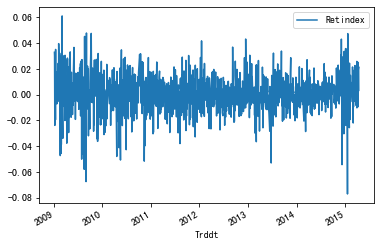

In [14]:
SHret.plot()

Text(0.5, 1.0, '绝对值')

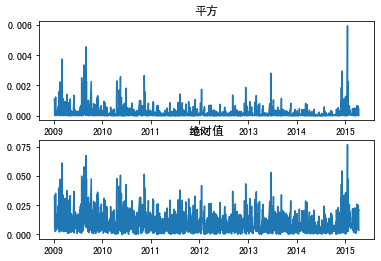

In [15]:
plt.subplot(211)
plt.plot(SHret**2)
plt.title('平方')
plt.subplot(212)
plt.plot(np.abs(SHret))
plt.title('绝对值')

In [18]:
box = stattools.q_stat(stattools.acf(SHret**2)[1:13],len(SHret))
box

(array([  5.22162033,  46.04575177,  77.40003242,  83.95656414,
         87.31680177, 105.62438476, 134.68253536, 138.21716021,
        145.74159096, 214.05372471, 222.70487255, 234.57370776]),
 array([2.23077560e-02, 1.00297947e-10, 1.10818758e-16, 2.52529889e-17,
        2.45865178e-17, 1.67817636e-20, 6.59728987e-26, 5.57127738e-26,
        6.71396216e-27, 1.87484810e-40, 1.41023265e-41, 2.23245825e-43]))

In [19]:
box[1][-1]

2.2324582490602526e-43

In [22]:
am = arch_model(SHret)  #对收益波动模型，建立模型
model = am.fit(update_freq=0)
model.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4464.735821933186
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 5


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/arch/univariate/base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001858. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<table class="simpletable">
<caption>Constant Mean - GARCH Model Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>Retindex</td>      <th>  R-squared:         </th>  <td>  -0.000</td> 
</tr>
<tr>
  <th>Mean Model:</th>       <td>Constant Mean</td>   <th>  Adj. R-squared:    </th>  <td>  -0.000</td> 
</tr>
<tr>
  <th>Vol Model:</th>            <td>GARCH</td>       <th>  Log-Likelihood:    </th> <td>   4464.74</td>
</tr>
<tr>
  <th>Distribution:</th>        <td>Normal</td>       <th>  AIC:               </th> <td>  -8921.47</td>
</tr>
<tr>
  <th>Method:</th>        <td>Maximum Likelihood</td> <th>  BIC:               </th> <td>  -8900.16</td>
</tr>
<tr>
  <th></th>                        <td></td>          <th>  No. Observations:  </th>    <td>1522</td>   
</tr>
<tr>
  <th>Date:</th>           <td>Sat, Apr 25 2020</td>  <th>  Df Residuals:      </th>    <td>1518</td>   
</tr>
<tr>
  <th>Time:</th>               <td>14:20:34</td>      <th>  Df Model:          </th>      <td>4</td>    
</tr>
</table>
<table class="simpletable">
<caption>Mean Model</caption>
<tr>
   <td></td>     <th>coef</th>     <th>std err</th>      <th>t</th>       <th>P>|t|</th>      <th>95.0% Conf. Int.</th>   
</tr>
<tr>
  <th>mu</th> <td>3.3362e-04</td> <td>3.181e-04</td> <td>    1.049</td> <td>    0.294</td> <td>[-2.899e-04,9.571e-04]</td>
</tr>
</table>
<table class="simpletable">
<caption>Volatility Model</caption>
<tr>
      <td></td>        <th>coef</th>     <th>std err</th>      <th>t</th>     <th>P>|t|</th>   <th>95.0% Conf. Int.</th>   
</tr>
<tr>
  <th>omega</th>    <td>3.7169e-06</td> <td>8.161e-14</td> <td>4.554e+07</td> <td>0.000</td> <td>[3.717e-06,3.717e-06]</td>
</tr>
<tr>
  <th>alpha[1]</th> <td>    0.0500</td> <td>3.347e-04</td> <td>  149.394</td> <td>0.000</td> <td>[4.934e-02,5.066e-02]</td>
</tr>
<tr>
  <th>beta[1]</th>  <td>    0.9300</td> <td>3.202e-03</td> <td>  290.427</td> <td>0.000</td>   <td>[  0.924,  0.936]</td>  
</tr>
</table><br/><br/>Covariance estimator: robust